<a href="https://colab.research.google.com/github/TyllerDaniel/Healthcare_LOS_Analytics/blob/master/Healthcare_LOS_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#import the data
from google.colab import files
uploaded = files.upload()

Saving sample_sub.csv to sample_sub (2).csv
Saving test_data.csv to test_data (1).csv
Saving train_data.csv to train_data.csv
Saving train_data_dictionary.csv to train_data_dictionary.csv


In [5]:
sample = pd.read_csv('sample_sub (2).csv')
sample.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [6]:
test = pd.read_csv('test_data (1).csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [7]:
train = pd.read_csv('train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
train_dictionary = pd.read_csv('train_data_dictionary.csv')
train_dictionary.head()

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital


In [9]:
train.shape

(318438, 18)

In [10]:
train = train.dropna()  

In [11]:
train.shape

(313793, 18)

In [12]:
#check the columns of the train data.
train.columns.values

array(['case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay'],
      dtype=object)

In [13]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000
mean,158937.911120,18.326419,4.778169,3.196419,2.622952,65743.029382,7.252447,3.280857,4881.893165
std,91939.506976,8.633613,3.103237,1.167924,0.872618,37978.083237,4.745243,1.761758,1086.243945
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79271.000000,11.000000,2.000000,2.000000,2.000000,32833.000000,4.000000,2.000000,4188.000000
50%,158950.000000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4742.000000
75%,238399.000000,26.000000,7.000000,4.000000,3.000000,98472.000000,8.000000,4.000000,5410.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [14]:
test.shape


(137057, 17)

In [15]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [16]:
test = test.dropna()

In [17]:
test.shape

(134865, 17)

In [18]:
X = train
y = test

In [21]:
#split the data into training and test
train, test = train_test_split(X, test_size=0.05,random_state = 42)

In [22]:
train.shape

(298103, 18)

In [23]:
test.shape

(15690, 18)

In [25]:
pip install pycaret


     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 266kB 8.6MB/s 
     |████████████████████████████████| 1.6MB 9.0MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 1.8MB 16.5MB/s 
     |████████████████████████████████| 266kB 31.8MB/s 
     |████████████████████████████████| 174kB 27.4MB/s 
     |████████████████████████████████| 66.1MB 128kB/s 
     |████████████████████████████████| 13.9MB 331kB/s 
     |████████████████████████████████| 6.8MB 35.8MB/s 
     |████████████████████████████████| 552kB 44.3MB/s 
     |████████████████████████████████| 2.1MB 35.9MB/s 
     |████████████████████████████████| 604kB 40.1MB/s 
     |████████████████████████████████| 3.1MB 41.6MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 6.0MB 34.1MB/s 
     |████████████████████████████████| 1.1MB 35.9MB/s 


In [1]:
from pycaret.classification import *

In [24]:
clf1 = setup(
    train, 
    target = 'Stay',
    ignore_features = ['case_id', 'patientid', 'Visitors with Patient'],
    session_id=1945,
     categorical_features=['City_Code_Patient', 'Hospital_code', 'Bed Grade'],
     use_gpu=True,
         silent = True
)

Setup Succesfully Completed!


,Description,Value
0,session_id,1945
1,Target Type,Multiclass
2,Label Encoded,"0-10: 0, 11-20: 1, 21-30: 2, 31-40: 3, 41-50: 4, 51-60: 5, 61-70: 6, 71-80: 7, 81-90: 8, 91-100: 9, More than 100 Days: 10"
3,Original Data,"(298103, 18)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
# best = compare_models(fold = 5)

best = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3497,0.0000,0.1498,0.3019,0.3006,0.1503,0.1571
1,0.3468,0.0000,0.1515,0.2979,0.2971,0.1468,0.1534
2,0.3455,0.0000,0.1481,0.2948,0.2947,0.1444,0.1512
3,0.3508,0.0000,0.1517,0.3134,0.3000,0.1508,0.1580
4,0.3448,0.0000,0.1511,0.2957,0.2967,0.1449,0.1512
5,0.3466,0.0000,0.1491,0.2959,0.2957,0.1467,0.1533
6,0.3471,0.0000,0.1510,0.3018,0.2974,0.1477,0.1542
7,0.3470,0.0000,0.1477,0.2945,0.2956,0.1463,0.1531
8,0.3500,0.0000,0.1529,0.3035,0.3000,0.1505,0.1575
9,0.3518,0.0000,0.1516,0.3068,0.3013,0.1538,0.1607


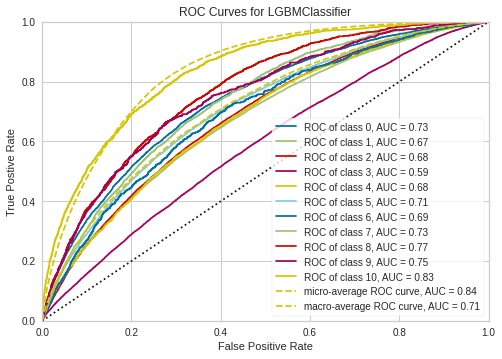

In [26]:
plot_model(best)

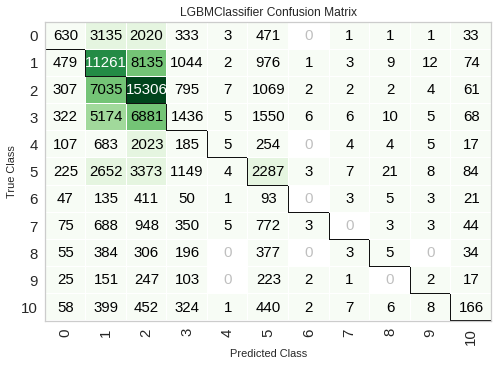

In [27]:
plot_model(best, plot='confusion_matrix')

In [28]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
tunned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3416,0.0000,0.1415,0.2824,0.2857,0.1353,0.1428
1,0.3436,0.0000,0.1420,0.2842,0.2869,0.1380,0.1458
2,0.3445,0.0000,0.1412,0.2832,0.2865,0.1389,0.1468
3,0.3485,0.0000,0.1435,0.2892,0.2910,0.1438,0.1520
4,0.3397,0.0000,0.1412,0.2841,0.2847,0.1336,0.1409
5,0.3418,0.0000,0.1404,0.2784,0.2840,0.1358,0.1434
6,0.3429,0.0000,0.1406,0.2811,0.2862,0.1373,0.1450
7,0.3446,0.0000,0.1400,0.2814,0.2860,0.1386,0.1465
8,0.3437,0.0000,0.1416,0.2863,0.2880,0.1378,0.1456
9,0.3479,0.0000,0.1415,0.2861,0.2890,0.1432,0.1514


In [30]:
#the Ensembled Tunde Model
ensembled = ensemble_model(tunned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3424,0.0000,0.1412,0.2842,0.2859,0.1358,0.1436
1,0.3433,0.0000,0.1411,0.2826,0.2852,0.1370,0.1450
2,0.3444,0.0000,0.1408,0.2825,0.2841,0.1381,0.1465
3,0.3473,0.0000,0.1421,0.2881,0.2877,0.1412,0.1498
4,0.3387,0.0000,0.1403,0.2826,0.2814,0.1313,0.1390
5,0.3414,0.0000,0.1398,0.2767,0.2815,0.1343,0.1423
6,0.3450,0.0000,0.1424,0.2855,0.2878,0.1399,0.1479
7,0.3432,0.0000,0.1400,0.2797,0.2832,0.1361,0.1443
8,0.3434,0.0000,0.1407,0.2858,0.2856,0.1366,0.1447
9,0.3479,0.0000,0.1423,0.2879,0.2887,0.1429,0.1513


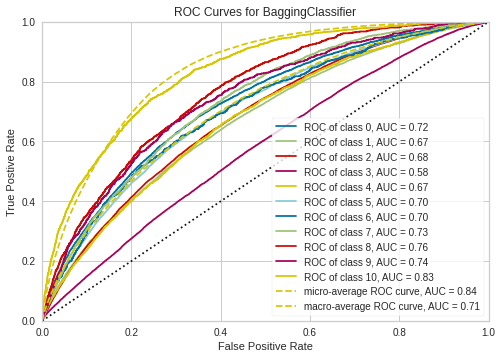

In [31]:
plot_model(ensembled)

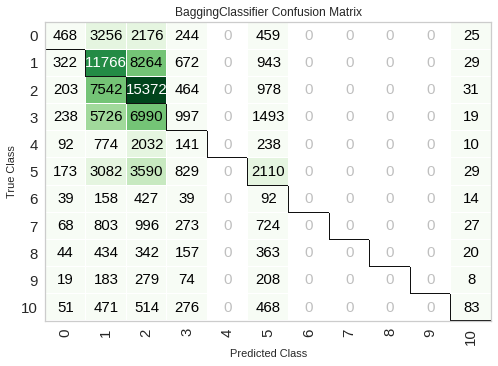

In [32]:
plot_model(ensembled, plot='confusion_matrix')

In [33]:
evaluate_model(ensembled)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
#Predict over test data
predict_test = predict_model(ensembled, test)
predict_test = predict_test.dropna()
predict_test.to_csv('predict_test.csv', index=False)
predict_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Label,Score
16,17.0,23.0,a,6.0,X,4.0,radiotherapy,Q,F,3.0,63418.0,8.0,Urgent,Extreme,4.0,71-80,2933.0,0-10,11-20,0.2569
24,25.0,26.0,b,2.0,Y,4.0,radiotherapy,Q,D,1.0,63418.0,8.0,Trauma,Extreme,4.0,71-80,4091.0,31-40,21-30,0.2976
30,31.0,27.0,a,7.0,Y,3.0,gynecology,R,C,3.0,8088.0,2.0,Urgent,Moderate,4.0,31-40,4515.0,51-60,11-20,0.3280
49,50.0,23.0,a,6.0,X,2.0,TB & Chest disease,R,F,1.0,44201.0,2.0,Emergency,Extreme,4.0,51-60,5327.0,51-60,21-30,0.2077
54,55.0,9.0,d,5.0,Z,2.0,radiotherapy,R,F,4.0,33340.0,2.0,Emergency,Moderate,2.0,31-40,4628.0,11-20,0-10,0.2647


In [35]:
#Analyse Result.
predict_test['comp'] = np.where(predict_test['Stay'] == predict_test['Label'], 'Correct', 'Incorrect')
predict_test.groupby('comp').count()['Label'] 

comp
Correct      238
Incorrect    519
Name: Label, dtype: int64

In [36]:
#Test the Result.
print(predict_test.groupby('comp').count()['Label'][0] / predict_test.groupby('comp').count()['Label'][1])

0.45857418111753373


In [37]:
#predict with  the model
submit = y
predict_submit = predict_model(ensembled, submit)

In [38]:
predict_submit

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Label,Score
0,318439.0,21.0,c,3.0,Z,3.0,gynecology,S,A,2.0,17006.0,2.0,Emergency,Moderate,2.0,71-80,3095.0,0-10,0.3260
1,318440.0,29.0,a,4.0,X,2.0,gynecology,S,F,2.0,17006.0,2.0,Trauma,Moderate,4.0,71-80,4018.0,51-60,0.3336
2,318441.0,26.0,b,2.0,Y,3.0,gynecology,Q,D,4.0,17006.0,2.0,Emergency,Moderate,3.0,71-80,4492.0,0-10,0.2687
3,318442.0,6.0,a,6.0,X,3.0,gynecology,Q,F,2.0,17006.0,2.0,Trauma,Moderate,3.0,71-80,4173.0,21-30,0.4862
4,318443.0,28.0,b,11.0,X,2.0,gynecology,R,F,2.0,17006.0,2.0,Trauma,Moderate,4.0,71-80,4161.0,21-30,0.2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491.0,11.0,b,2.0,Y,4.0,anesthesia,Q,D,3.0,41160.0,3.0,Emergency,Minor,4.0,41-50,6313.0,11-20,NaN
137053,455492.0,25.0,e,1.0,X,2.0,radiotherapy,R,E,4.0,30985.0,7.0,Emergency,Moderate,2.0,0-10,3510.0,0-10,NaN
137054,455493.0,30.0,c,3.0,Z,2.0,anesthesia,R,A,4.0,81811.0,12.0,Urgent,Minor,2.0,0-10,7190.0,11-20,NaN
137055,455494.0,5.0,a,1.0,X,2.0,anesthesia,R,E,4.0,57021.0,10.0,Trauma,Minor,2.0,41-50,5435.0,11-20,NaN


In [39]:
predict_submit_format = pd.DataFrame({ 'case_id': predict_submit['case_id'], 'Stay': predict_submit['Label']})
predict_submit_format.to_csv('Submission.csv', index=False)
predict_submit_format

,case_id,Stay
0,318439.0,0-10
1,318440.0,51-60
2,318441.0,0-10
3,318442.0,21-30
4,318443.0,21-30
...,...,...
137052,455491.0,11-20
137053,455492.0,0-10
137054,455493.0,11-20
137055,455494.0,11-20


In [40]:
finalize_model(ensembled)

BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1,
                                                max_depth=100,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0,
                                                n_estimators=70, n_jobs=-1,
                                                num_leaves=10, objective=None,
                                                random_state=1945,
                                                reg_alpha=0.4, reg_lambda=0.2,
                                                silent=True, subsample=1.0,
     

In [41]:
save_model(ensembled, 'model')

Transformation Pipeline and Model Succesfully Saved
